Data Mining Exercise 3.1 		


---




Teacher : Dr.Farahani

Student : Amin Dehghan Monfared  
SID : 99422085


Spring 2021


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
%matplotlib inline


from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn import svm
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



np.random.seed(seed=42)

# Download and Extract Data

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [ ]:
!pip instal -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d iabhishekofficial/mobile-price-classification

import zipfile

zip_ref = zipfile.ZipFile('mobile-price-classification.zip','r')
zip_ref.extractall('files')
zip_ref.close

ERROR: unknown command "instal" - maybe you meant "install"


Saving kaggle.json to kaggle.json
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 26.8MB/s]


<bound method ZipFile.close of <zipfile.ZipFile filename='mobile-price-classification.zip' mode='r'>>

# SVM


## Load Data 


In [ ]:
train = pd.read_csv("./files/train.csv")
test = pd.read_csv("./files/test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['price_range']), train['price_range'], train_size = 0.8, stratify=train['price_range'], random_state=42)

X_train.shape , y_train.shape, X_val.shape, y_val.shape

((1600, 20), (1600,), (400, 20), (400,))

In [ ]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

## Model Experiments

### Apply SVM

In [ ]:

clf_1 = svm.SVC(kernel='linear')

clf_1.fit(X_train, y_train)

y_val_pred = clf_1.predict(X_val)

In [ ]:
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.95      0.95      0.95       100
           2       0.95      0.95      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



### use different kernels and parameters

In [ ]:

clf_2 = svm.SVC(kernel='poly', degree=2)

clf_2.fit(X_train, y_train)

y_val_pred = clf_2.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.56      0.49      0.52       100
           1       0.41      0.45      0.43       100
           2       0.42      0.52      0.46       100
           3       0.55      0.42      0.47       100

    accuracy                           0.47       400
   macro avg       0.48      0.47      0.47       400
weighted avg       0.48      0.47      0.47       400



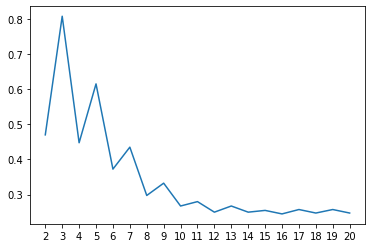

In [ ]:
accs = []
for i in range(2,21):

  clf_2 = svm.SVC(kernel='poly', degree=i)

  clf_2.fit(X_train, y_train)

  y_val_pred = clf_2.predict(X_val)

  # Results
  accs.append(metrics.accuracy_score(y_val, y_val_pred))


plt.plot(np.arange(2,21), accs)
plt.xticks(np.arange(2,21))
plt.show()

In [ ]:
clf_2 = svm.SVC(kernel='poly', degree=3)

clf_2.fit(X_train, y_train)

y_val_pred = clf_2.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       100
           1       0.71      0.84      0.77       100
           2       0.73      0.72      0.73       100
           3       0.89      0.85      0.87       100

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



In [ ]:

clf_3 = svm.SVC(kernel='rbf')

clf_3.fit(X_train, y_train)

y_val_pred = clf_3.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.87      0.87       100
           2       0.82      0.87      0.84       100
           3       0.94      0.90      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
clf_4 = svm.SVC(kernel='sigmoid')

clf_4.fit(X_train, y_train)

y_val_pred = clf_4.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.89      0.92      0.91       100
           2       0.89      0.87      0.88       100
           3       0.94      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### Try Soft-margin and Hard margin 

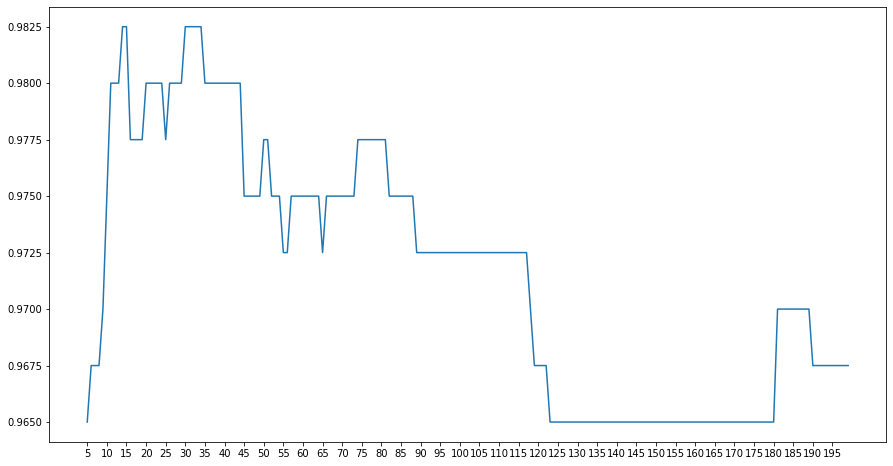

In [ ]:
x = np.arange(5,200,1)
accs = []
for i in x:

  clf = svm.SVC(kernel='linear', C=i)
  clf.fit(X_train, y_train)
  y_val_pred = clf.predict(X_val)

  accs.append(metrics.accuracy_score(y_val, y_val_pred))

plt.figure(figsize=(15,8))
plt.plot(x, accs)
plt.xticks(x[0::5])
plt.show()

### Feature enginearing

#### a.

In [ ]:
# min 501 ~= 500 , max 1998 ~= 2000
train_1 = train.copy()
bins = [0,500,1000,1500,2000]
labels =[1,2,3,4]
train_1['bin'] = pd.cut(train_1['battery_power'], bins=bins,labels=False)
train_1.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_1.drop(columns=['price_range']), train_1['price_range'], train_size = 0.8, stratify=train_1['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.95      0.93      0.94       100
           2       0.93      0.93      0.93       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# min 501 ~= 500 , max 1998 ~= 2000
train_1 = train.copy()
bins = [0,250,500,750,1000,1250,1500,1750,2000]
labels =[1,2,3,4]
train_1['bin'] = pd.cut(train_1['battery_power'], bins=bins,labels=False)
train_1.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_1.drop(columns=['price_range']), train_1['price_range'], train_size = 0.8, stratify=train_1['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.95      0.93      0.94       100
           2       0.92      0.93      0.93       100
           3       0.95      0.97      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
# min 501 ~= 500 , max 1998 ~= 2000
train_1 = train.copy()
bins = [0,1000,1400,1800,2000]
labels =[1,2,3,4]
train_1['bin'] = pd.cut(train_1['battery_power'], bins=bins, labels=labels)
train_1.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_1.drop(columns=['price_range']), train_1['price_range'], train_size = 0.8, stratify=train_1['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM


clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.95      0.95      0.95       100
           2       0.95      0.95      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# min 501 ~= 500 , max 1998 ~= 2000
train_1 = train.copy()
bins = [0,400,700,1000,1300,2000]
labels =[1,2,3,4,5]
train_1['bin'] = pd.cut(train_1['battery_power'], bins=bins, labels=labels)
train_1.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_1.drop(columns=['price_range']), train_1['price_range'], train_size = 0.8, stratify=train_1['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.95      0.95      0.95       100
           2       0.96      0.94      0.95       100
           3       0.95      1.00      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



#### b.

In [ ]:
# Helper function for one-hot encodeing with pandas
def onehot_encode(df, column):
    #df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df


In [ ]:
# Encode Categorical Data
cat_cols_names = ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
train_tr = train.copy()
for column in cat_cols_names:
    train_tr = onehot_encode(train_tr, column)


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_tr.drop(columns=['price_range']), train_tr['price_range'], train_size = 0.8, stratify=train_tr['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.93      1.00      0.97       100
           2       1.00      0.96      0.98       100
           3       0.99      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



#### c.

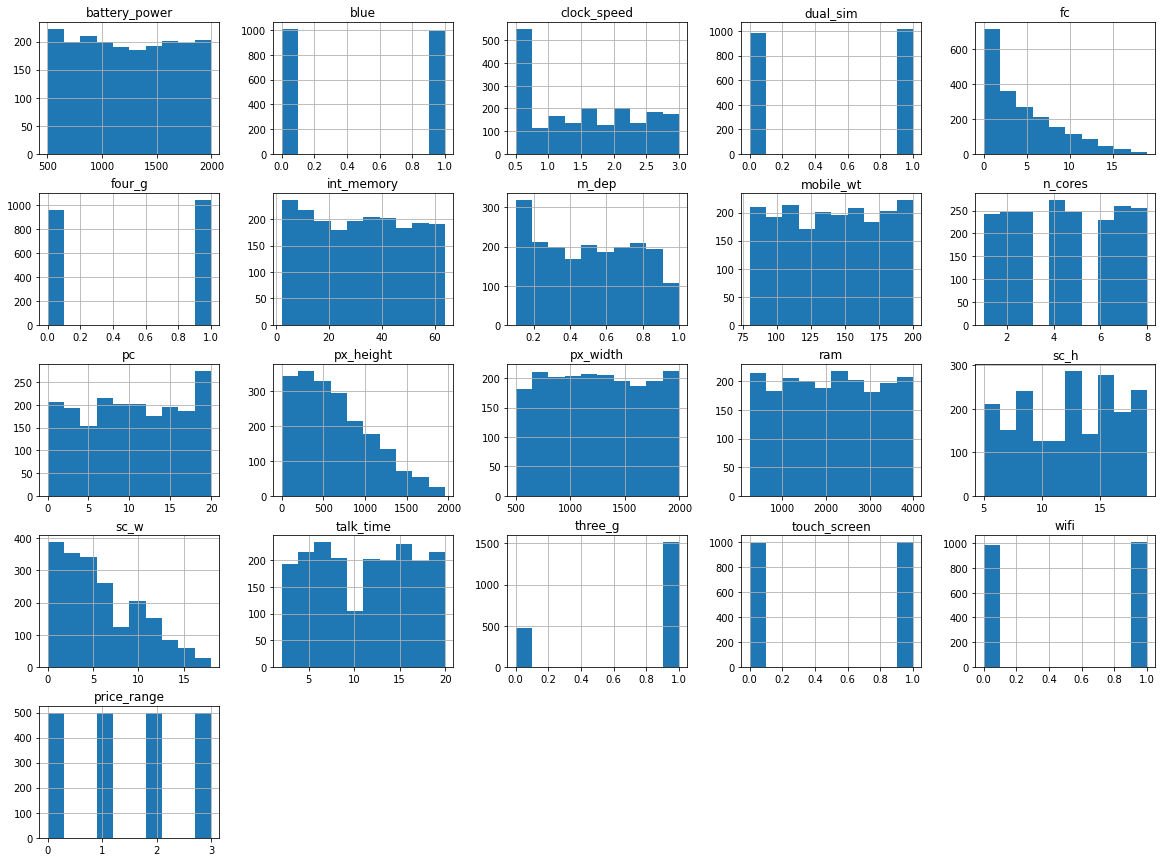

In [ ]:
train.hist(figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


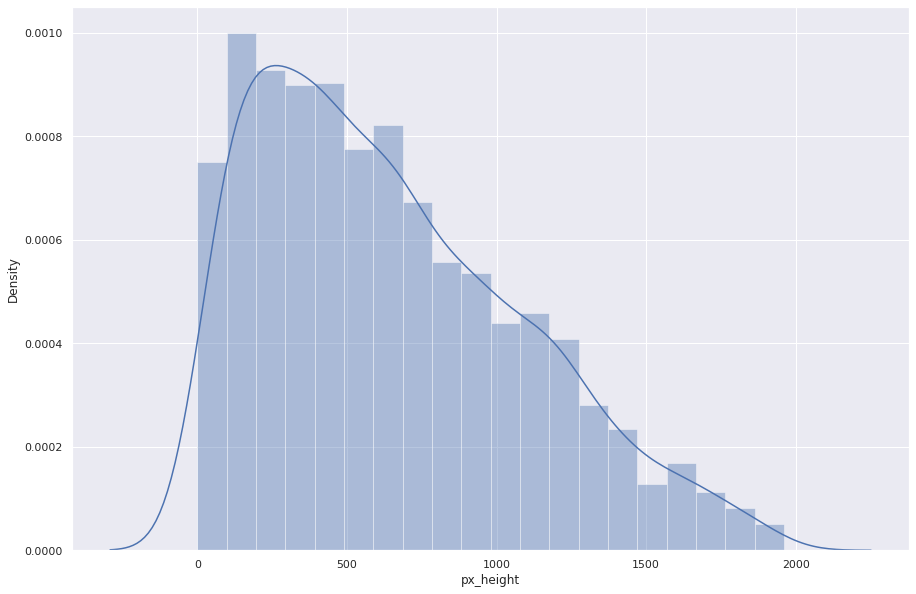

In [ ]:


sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(train['px_height'],kde_kws={"label": 'px_height'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


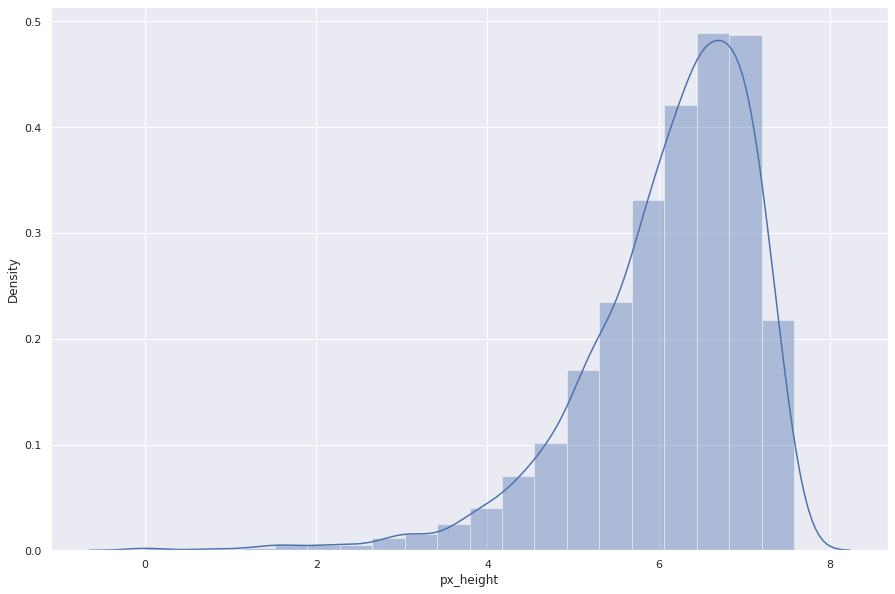

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(np.log(train["px_height"]- (train['px_height'].min()-1)),kde_kws={"label": 'px_height'}, bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


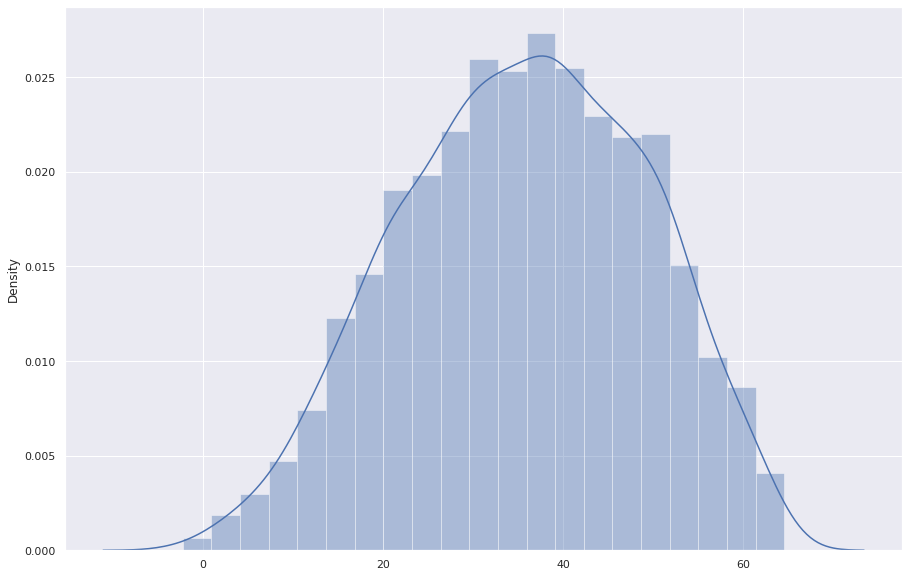

In [ ]:

sns.set(rc={'figure.figsize':(15,10)})
xt, _ = stats.boxcox(train["px_height"]+1e-10 )
sns.distplot(xt)


In [ ]:

train_3 = train.copy()
xt, _ = stats.boxcox(train["px_height"]+1e-10 )
train_3['px_height'] = xt


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_3.drop(columns=['price_range']), train_3['price_range'], train_size = 0.8, stratify=train_3['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.94      0.94      0.94       100
           2       0.94      0.92      0.93       100
           3       0.95      0.98      0.97       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



#### d

In [ ]:
# 1 


# X_train['sc_area'] = X_train['sc_h']* X_train['sc_w']
# X_val['sc_area'] = X_val['sc_h']* X_val['sc_w']

train_new = train.copy()
train_new['sc_area'] = train_new['sc_h']* train_new['sc_w']
train_new = train_new.drop(columns=['sc_h', 'sc_w'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_new.drop(columns=['price_range']), train_new['price_range'], train_size = 0.8,
                                                  stratify=train_new['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.95      0.95      0.95       100
           2       0.94      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
#2 

# df['sc_area'] = df['sc_h']* df['sc_w']
# df['m_vol'] = df['sc_h']* df['sc_w']* df['m_dep']


train_new = train.copy()
train_new['m_vol'] = train_new['sc_h']* train_new['sc_w']* train_new['m_dep']
train_new = train_new.drop(columns=['sc_h', 'sc_w','m_dep'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_new.drop(columns=['price_range']), train_new['price_range'], train_size = 0.8,
                                                  stratify=train_new['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.95      0.95      0.95       100
           2       0.94      0.93      0.93       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# Apply both features
train_new = train.copy()
train_new['m_vol'] = train_new['sc_h']* train_new['sc_w']* train_new['m_dep']
train_new['sc_area'] = train_new['sc_h']* train_new['sc_w']
#train_new = train_new.drop(columns=['sc_h', 'sc_w','m_dep'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_new.drop(columns=['price_range']), train_new['price_range'], train_size = 0.8,
                                                  stratify=train_new['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.96      0.95      0.95       100
           2       0.95      0.94      0.94       100
           3       0.95      0.99      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  three_g        2000 non-null   int64  
 15  touch_screen   2000 non-null   int64  
 16  wifi           2000 non-null   int64  
 17  price_range    2000 non-null   int64  
 18  m_vol   

### Expriments with Feature enginearing

In [ ]:
train_all = train.copy()

bins = [0,500,1000,1500,2000]
labels =[1,2,3,4]
train_all['bin'] = pd.cut(train_all['battery_power'], bins=bins,labels=False)
train_all.drop(columns=['battery_power'])

cat_cols_names = ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for column in cat_cols_names:
    train_all = onehot_encode(train_all, column)

xt, _ = stats.boxcox(train["px_height"]+1e-10 )
train_all['px_height'] = xt

train_all['m_vol'] = train_all['sc_h']* train_all['sc_w']* train_all['m_dep']
train_all['sc_area'] = train_all['sc_h']* train_all['sc_w']

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_all.drop(columns=['price_range']), train_all['price_range'], train_size = 0.8,
                                                  stratify=train_all['price_range'], random_state=42)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.93      0.95      0.94       100
           2       0.94      0.90      0.92       100
           3       0.94      0.97      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



## Descision Tree



In [ ]:

tr_clf = DecisionTreeClassifier(random_state=42)

tr_clf.fit(X_train, y_train)

y_val_pred = tr_clf.predict(X_val)

print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



### Expriments with DT

best accuracy 0.84 with max_depth = 10


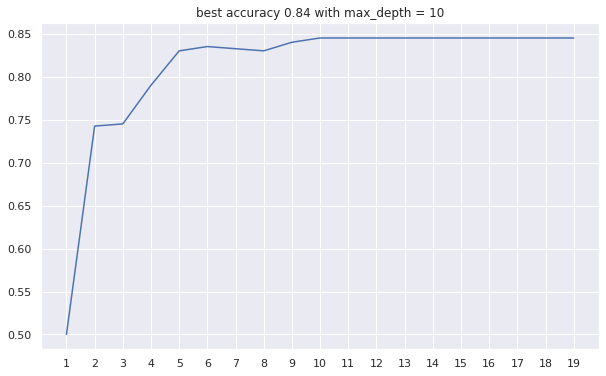

In [100]:

t = np.arange(1,20)
accs = []
for i in t:
  tr_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  tr_clf.fit(X_train, y_train)
  y_val_pred = tr_clf.predict(X_val)
  accs.append(metrics.accuracy_score(y_val, y_val_pred))

best = max(accs)
best_idx  = accs.index(best)
print('best accuracy {:.2f} with max_depth = {}'.format(best, t[best_idx]))


plt.figure(figsize=(10,6))
plt.plot(t, accs)
plt.title('best accuracy {:.2f} with max_depth = {}'.format(best, t[best_idx]))
plt.xticks(t)
plt.show()

best accuracy 0.86 with min_samples_split = 6


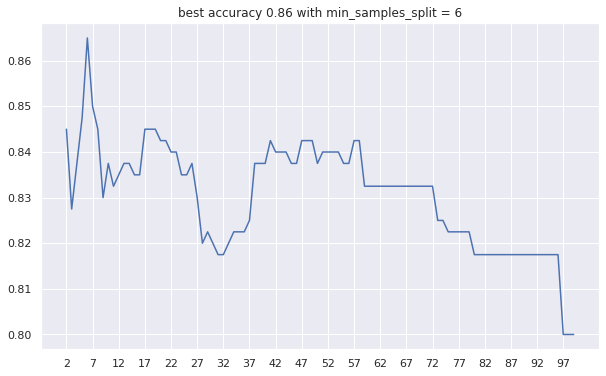

In [102]:

t = np.arange(2,100)
accs = []
for i in t:
  tr_clf = DecisionTreeClassifier(min_samples_split=i,random_state=42)
  tr_clf.fit(X_train, y_train)
  y_val_pred = tr_clf.predict(X_val)
  accs.append(metrics.accuracy_score(y_val, y_val_pred))

best = max(accs)
best_idx  = accs.index(best)
print('best accuracy {:.2f} with min_samples_split = {}'.format(best, t[best_idx]))


plt.figure(figsize=(10,6))
plt.plot(t, accs)
plt.xticks(t[0::5])
plt.title('best accuracy {:.2f} with min_samples_split = {}'.format(best, t[best_idx]))
plt.show()

best accuracy 0.85 with min_samples_leaf = 2


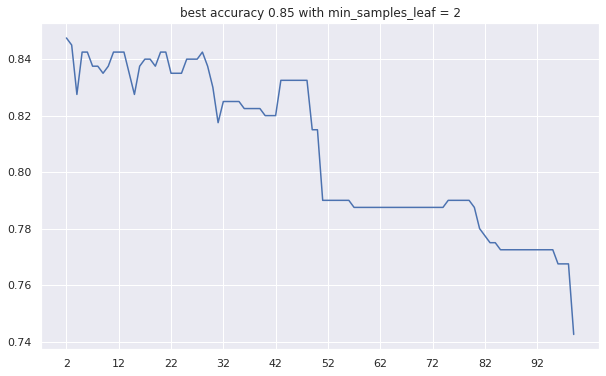

In [103]:

t = np.arange(2,100)
accs = []
for i in t:
  tr_clf = DecisionTreeClassifier(min_samples_leaf=i,random_state=42)
  tr_clf.fit(X_train, y_train)
  y_val_pred = tr_clf.predict(X_val)
  accs.append(metrics.accuracy_score(y_val, y_val_pred))

best = max(accs)
best_idx  = accs.index(best)
print('best accuracy {:.2f} with min_samples_leaf = {}'.format(best, t[best_idx]))

plt.figure(figsize=(10,6))
plt.plot(t, accs)
plt.title('best accuracy {:.2f} with min_samples_leaf = {}'.format(best, t[best_idx]))
plt.xticks(t[0::10])
plt.show()

best accuracy 0.85 with max_leaf_nodes = 54


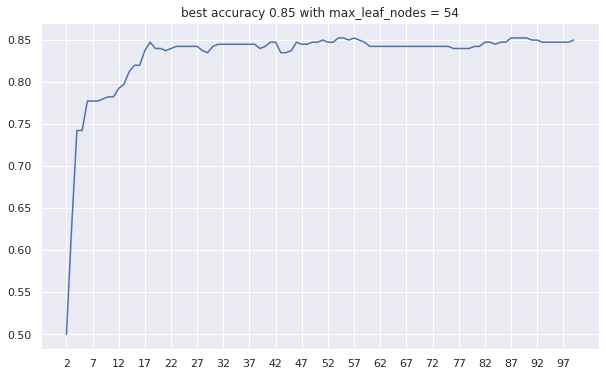

In [104]:

t = np.arange(2,100)
accs = []
for i in t:
  tr_clf = DecisionTreeClassifier(max_leaf_nodes=i,random_state=42)
  tr_clf.fit(X_train, y_train)
  y_val_pred = tr_clf.predict(X_val)
  accs.append(metrics.accuracy_score(y_val, y_val_pred))

best = max(accs)
best_idx  = accs.index(best)
print('best accuracy {:.2f} with max_leaf_nodes = {}'.format(best, t[best_idx]))

plt.figure(figsize=(10,6))
plt.plot(t, accs)
plt.title('best accuracy {:.2f} with max_leaf_nodes = {}'.format(best, t[best_idx]))
plt.xticks(t[0::5])
plt.show()

## Prunning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [105]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

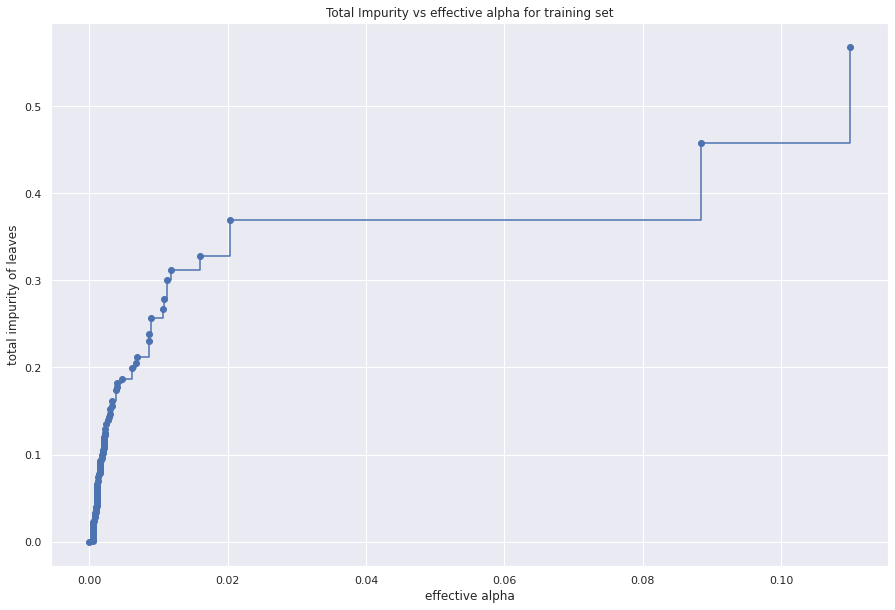

In [106]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [107]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18256003721344005


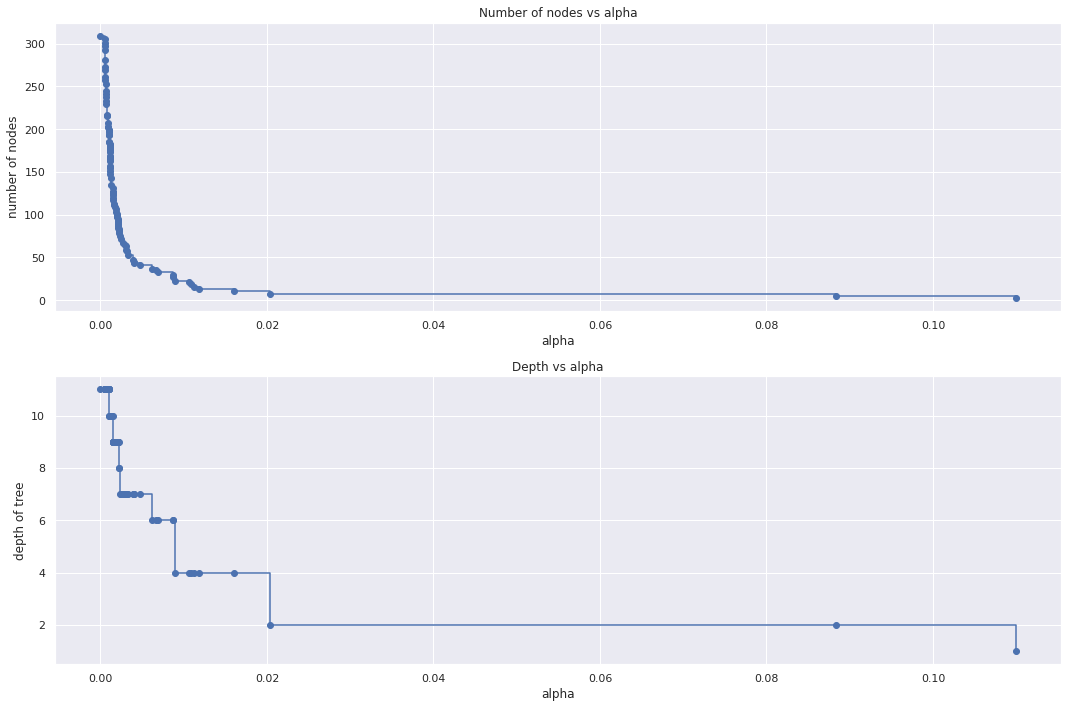

In [108]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

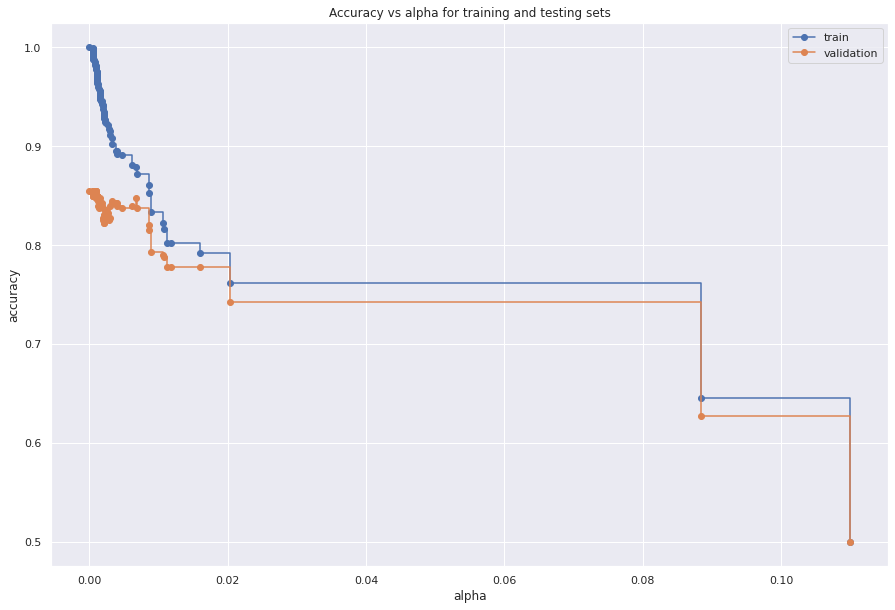

In [109]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Random Forest

In [ ]:


rnd_clf = RandomForestClassifier(n_estimators=900, max_leaf_nodes=55, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_val_pred = rnd_clf.predict(X_val)
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.79      0.82      0.80       100
           2       0.83      0.78      0.80       100
           3       0.96      0.96      0.96       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



best accuracy 0.89 with n_estimators = 281


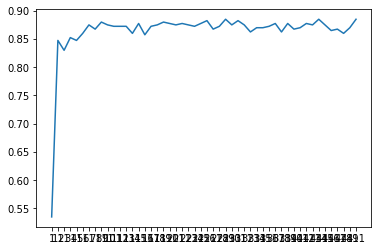

In [ ]:
t = np.arange(1,500,10)
accs = []
for i in t:
  rnd_clf = RandomForestClassifier(n_estimators=i, max_leaf_nodes=55, n_jobs=-1)
  rnd_clf.fit(X_train, y_train)
  y_val_pred = rnd_clf.predict(X_val)
  accs.append(metrics.accuracy_score(y_val, y_val_pred))

best = max(accs)
best_idx  = accs.index(best)
print('best accuracy {:.2f} with n_estimators = {}'.format(best, t[best_idx]))

plt.plot(t, accs)
plt.xticks(t)
plt.show()

# Bitcoin Data


In [ ]:
btc_train = pd.read_csv('Bitcoin Historical Data - train.csv')
btc_test = pd.read_csv('Bitcoin Historical Data - test.csv')

In [ ]:
btc_train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 01, 2020","7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%
1,"Dec 31, 2019","7,196.4","7,261.5","7,331.0","7,167.4",586.60K,-0.90%
2,"Dec 30, 2019","7,261.8","7,397.5","7,420.9","7,244.1",606.11K,-1.84%
3,"Dec 29, 2019","7,397.5","7,321.6","7,518.9","7,303.0",611.69K,1.04%
4,"Dec 28, 2019","7,321.5","7,261.9","7,375.9","7,256.5",610.96K,0.82%


In [ ]:
btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3455 non-null   object
 1   Price     3455 non-null   object
 2   Open      3455 non-null   object
 3   High      3455 non-null   object
 4   Low       3455 non-null   object
 5   Vol.      3455 non-null   object
 6   Change %  3455 non-null   object
dtypes: object(7)
memory usage: 189.1+ KB


In [ ]:
from datetime import datetime


def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')


def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if isinstance(text, (int, float)):
      pass

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        #print(num)
        return int(float(num) * d[magnitude])

    elif not text[-1] in d:
        return bad_data_val
    else:

        print(text)
        return float(text)

In [ ]:

btc_train['Date'] = btc_train['Date'].apply(mdy_to_ymd)
btc_test['Date'] = btc_test['Date'].apply(mdy_to_ymd)

btc_train['Date'] = pd.to_datetime(btc_train['Date'], format= '%Y-%m-%d', errors='coerce')
btc_test['Date'] = pd.to_datetime(btc_test['Date'], format= '%Y-%m-%d', errors='coerce')

btc_train.replace(',','', regex=True, inplace=True)
btc_test.replace(',','', regex=True, inplace=True)

btc_train.replace('%','', regex=True, inplace=True)
btc_test.replace('%','', regex=True, inplace=True)

btc_train['Vol.'] = btc_train['Vol.'].apply(text_to_num)
btc_test['Vol.'] = btc_test['Vol.'].apply(text_to_num)

cols = btc_train.columns.to_list()
cols.remove('Date')
for c in cols :
  btc_train[c] = btc_train[c].apply(pd.to_numeric,errors='coerce')
  btc_test[c] = btc_test[c].apply(pd.to_numeric,errors='coerce')


In [ ]:
btc_train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280,0.05
1,2019-12-31,7196.4,7261.5,7331.0,7167.4,586600,-0.90
2,2019-12-30,7261.8,7397.5,7420.9,7244.1,606110,-1.84
3,2019-12-29,7397.5,7321.6,7518.9,7303.0,611690,1.04
4,2019-12-28,7321.5,7261.9,7375.9,7256.5,610960,0.82


In [ ]:
btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3455 non-null   datetime64[ns]
 1   Price     3455 non-null   float64       
 2   Open      3455 non-null   float64       
 3   High      3455 non-null   float64       
 4   Low       3455 non-null   float64       
 5   Vol.      3455 non-null   int64         
 6   Change %  3455 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 189.1 KB


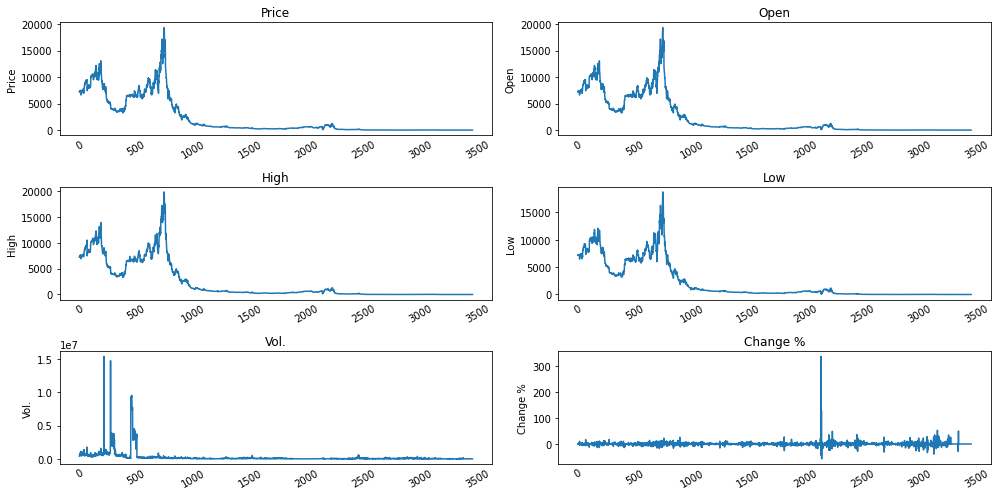

In [ ]:
import matplotlib.dates as mdates # Formatting dates
import datetime
# Plot histograms
df_plot = btc_train.copy()
df_plot.set_index('Date')
df_plot = df_plot.drop(columns=['Date'])
list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length / ncols, 0))


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        #ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

# seq

In [ ]:
train_seq = btc_train.sort_values(by=['Date']).copy()
train_seq.drop(columns=['Date'], inplace=True)
# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_seq.index

# Adding Month and Year in separate columns
# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
# train_df['Year'] = d.strftime("%Y") 

# We reset the index, so we can convert the date-index to a number-index
train_seq = train_seq.reset_index(drop=True).copy()
train_seq.head(5)

,Price,Open,High,Low,Vol.,Change %
0,0.1,0.0,0.1,0.1,80,0.0
1,0.1,0.1,0.1,0.1,570,0.0
2,0.1,0.1,0.1,0.1,260,0.0
3,0.1,0.1,0.1,0.1,580,0.0
4,0.1,0.1,0.1,0.1,2160,0.0


In [ ]:
# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Vol.', 'Price']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_seq)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Price']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Vol.', 'Price']


,High,Low,Open,Vol.,Price,Prediction
3450,7375.9,7256.5,7261.9,610960,7321.5,7321.5
3451,7518.9,7303.0,7321.6,611690,7397.5,7397.5
3452,7420.9,7244.1,7397.5,606110,7261.8,7261.8
3453,7331.0,7167.4,7261.5,586600,7196.4,7196.4
3454,7259.4,7180.0,7196.4,420280,7199.8,7199.8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Price = pd.DataFrame(data_filtered_ext['Price'])
np_Price_scaled = scaler_pred.fit_transform(df_Price)

(3455, 5)


In [ ]:
import math
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(2714, 50, 5) (2714,)
(691, 50, 5) (691,)
0.1
0.1


### Lstm

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns

# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')



250 50 5


In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
170/170 [==============================] - 49s 187ms/step - loss: 7042420.5196 - val_loss: 57879964.0000
Epoch 2/50
170/170 [==============================] - 31s 180ms/step - loss: 7701126.7193 - val_loss: 55499028.0000
Epoch 3/50
170/170 [==============================] - 30s 176ms/step - loss: 7064107.2076 - val_loss: 52736988.0000
Epoch 4/50
170/170 [==============================] - 31s 181ms/step - loss: 5583394.8447 - val_loss: 51670868.0000
Epoch 5/50
170/170 [==============================] - 31s 181ms/step - loss: 6811707.6164 - val_loss: 49669028.0000
Epoch 6/50
170/170 [==============================] - 30s 175ms/step - loss: 5472147.1155 - val_loss: 51667224.0000
Epoch 7/50
170/170 [==============================] - 31s 183ms/step - loss: 6208724.8187 - val_loss: 51125796.0000
Epoch 8/50
170/170 [==============================] - 32s 189ms/step - loss: 5402315.4316 - val_loss: 49176660.0000
Epoch 9/50
170/170 [==============================] - 30s 177ms/step - l

## Without seq

In [110]:
from sklearn.metrics import mean_squared_error


# Compute Accuracy of Regression using epsilon as error tolerence trashold
def regressor_accuracy(y_orig,y_pred,epsilon = 0.1):

  diff = np.abs(np.subtract(y_orig,y_pred))
  return np.sum(np.where(diff<=y_orig*epsilon,1,0))/y_orig.shape[0]


In [111]:
train_rf = btc_train.copy()
test_rf = btc_train.copy()

train_rf ['Date_year'] = train_rf ['Date'].dt.year
train_rf ['Date_month'] = train_rf ['Date'].dt.month
train_rf ['Date_week'] = train_rf ['Date'].dt.week
train_rf ['Date_day'] = train_rf ['Date'].dt.day
train_rf ['Date_dayofweek'] = train_rf ['Date'].dt.dayofweek
train_rf.drop(columns=['Date'], inplace=True)

test_rf ['Date_year'] = test_rf ['Date'].dt.year
test_rf ['Date_month'] = test_rf ['Date'].dt.month
test_rf ['Date_week'] = test_rf ['Date'].dt.week
test_rf ['Date_day'] = test_rf ['Date'].dt.day
test_rf ['Date_dayofweek'] = test_rf ['Date'].dt.dayofweek
test_rf.drop(columns=['Date'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [112]:
# shuffle the samples
train_rf = train_rf.sample(n = len(train_rf), random_state = 42)
train_rf = train_rf.reset_index(drop = True)

train_rf_valid = train_rf.sample(frac = 0.3, random_state = 42)
train_rf_train = train_rf.drop(train_rf_valid.index)

In [113]:
X_train = train_rf_train.drop(columns=['Price'])
y_train = train_rf_train['Price']

X_val = train_rf_valid.drop(columns=['Price'])
y_val = train_rf_valid['Price']

X_test = test_rf.drop(columns=['Price'])
y_test = test_rf['Price']

In [114]:
X_train.head()

,Open,High,Low,Vol.,Change %,Date_year,Date_month,Date_week,Date_day,Date_dayofweek
1,9036.9,9066.4,8649.4,601160,-3.32,2019,11,46,11,0
2,640.1,641.3,634.9,27690,-0.43,2016,10,42,17,0
3,141.9,144.4,139.4,9570,-1.13,2013,10,40,1,1
4,6055.2,6259.0,6032.8,142900,1.84,2018,6,25,23,5
5,9732.6,9969.6,9638.2,87760,1.78,2017,11,48,28,1


### 19.adaboost

In [123]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(random_state=42, n_estimators=800)
adab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=800, random_state=42)

In [124]:
y_pred_val = adab.predict(X_val)

print( 'validation mse : {:.4f}'.format(mean_squared_error(y_val, y_pred_val)))
print('validation accuracy with epsilon error: {:.2f}'.format(regressor_accuracy(y_val,y_pred_val)))

validation mse : 62889.3881
validation accuracy with epsilon error: 0.42


In [125]:
y_pred_test = adab.predict(X_test)

print('test mse : {:.4f}'.format(mean_squared_error(y_test, y_pred_test)))
print('test accuracy with epsilon error: {:.2f}'.format(regressor_accuracy(y_test,y_pred_test)))

test mse : 54391.8135
test accuracy with epsilon error: 0.37


### 20.random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 100, n_estimators=500, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_val = rf.predict(X_val)

print( 'validation mse : {:.4f}'.format(mean_squared_error(y_val, y_pred_val)))
print('validation accuracy with epsilon error: {:.2f}'.format(regressor_accuracy(y_val,y_pred_val)))

validation mse : 14546.5734
validation accuracy with epsilon error: 0.97


In [ ]:
y_pred_test = rf.predict(X_test)

print('test mse : {:.4f}'.format(mean_squared_error(y_test, y_pred_test)))
print('test accuracy with epsilon error: {:.2f}'.format(regressor_accuracy(y_test,y_pred_test)))

test mse : 5339.7832
test accuracy with epsilon error: 0.99


# Predict increase in price

In [ ]:
train_inc = btc_train.copy()
test_inc = btc_train.copy()


train_inc['next_price'] = train_inc['Price'].shift(-1)
train_inc['Increased'] = train_inc['Price'] < train_inc['next_price']
train_inc.drop(columns=['next_price'], inplace=True)


test_inc['next_price'] = test_inc['Price'].shift(-1)
test_inc['Increased'] = test_inc['Price'] < test_inc['next_price']
test_inc.drop(columns=['next_price'], inplace=True)

train_inc.head()

,Date,Price,Open,High,Low,Vol.,Change %,Increased
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280,0.05,False
1,2019-12-31,7196.4,7261.5,7331.0,7167.4,586600,-0.90,True
2,2019-12-30,7261.8,7397.5,7420.9,7244.1,606110,-1.84,True
3,2019-12-29,7397.5,7321.6,7518.9,7303.0,611690,1.04,False
4,2019-12-28,7321.5,7261.9,7375.9,7256.5,610960,0.82,False
